# What's it take to be a Survivor?

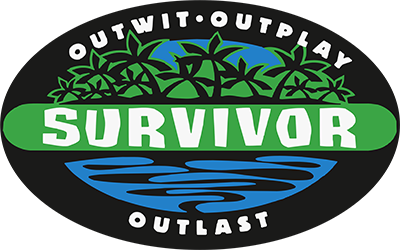

importing all of your important packages first...

In [3]:
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
from datetime import datetime
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

set the theme...

In [4]:
colors = ['#3ba84f', '#2381ca', '#1b1e1c', '#757474', '#eef0ee']

In [5]:
all_szn_URL = 'https://en.wikipedia.org/wiki/Survivor_(American_TV_series)'

response = requests.get(all_szn_URL)

In [6]:
type(response)

requests.models.Response

check it out...

In [7]:
response.status_code

200

# nice :)

In [8]:
soup = BS(response.text)

In [9]:
soup.find('title').text

'Survivor (American TV series) - Wikipedia'

In [10]:
soup.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="font-size:95%; text-align:center">
<caption>List of <i>Survivor</i> seasons
</caption>
<tbody><tr>
<th style="width:2%;">Season
</th>
<th style="width:15%;">Subtitle
</th>
<th style="width:20%;">Location
</th>
<th style="width:20%;">Original tribes
</th>
<th style="width:15%;">Winner
</th>
<th colspan="2" style="width:20%">Runner(s)-up
</th>
<th style="white-space:nowrap">Final vote
</th></tr>
<tr>
<th><a href="/wiki/Survivor:_Borneo" title="Survivor: Borneo">1</a>
</th>
<td><i>Borneo</i><sup class="reference" id="cite_ref-12"><a href="#cite_note-12">[c]</a></sup></td>
<td><a href="/wiki/Tiga_Island,_Malaysia" title="Tiga Island, Malaysia">Pulau Tiga</a>, <a href="/wiki/Sabah" title="Sabah">Sabah</a>, Malaysia</td>
<td rowspan="4">Two tribes of eight new players</td>
<td><a href="/wiki/Richard_Hatch_(Survivor_contestant)" title="Richard Hatch (Survivor contestant)">Richard Hatch</a></td>
<td colspan="2">Kelly Wiglesworth</td>
<td rowspan="2">4–3

In [11]:
seasons_df = pd.read_html(str(soup.find('table', attrs={'class' : 'wikitable'})))[0]
seasons_df

,Season,Subtitle,Location,Original tribes,Winner,Runner(s)-up,Runner(s)-up.1,Final vote
0,1,Borneo[c],"Pulau Tiga, Sabah, Malaysia",Two tribes of eight new players,Richard Hatch,Kelly Wiglesworth,Kelly Wiglesworth,4–3
1,2,The Australian Outback,"Herbert River at Goshen Station, Queensland, A...",Two tribes of eight new players,Tina Wesson,Colby Donaldson,Colby Donaldson,4–3
2,3,Africa,"Shaba National Reserve, Kenya[10]",Two tribes of eight new players,Ethan Zohn,Kim Johnson,Kim Johnson,5–2
3,4,Marquesas,"Nuku Hiva, Marquesas Islands, French Polynesia",Two tribes of eight new players,Vecepia Towery,Neleh Dennis,Neleh Dennis,4–3
4,5,Thailand,"Ko Tarutao, Satun Province, Thailand",Two tribes of eight new players; picked by the...,Brian Heidik,Clay Jordan,Clay Jordan,4–3
5,6,The Amazon,"Rio Negro, Amazonas, Brazil",Two tribes of eight new players divided by gender,Jenna Morasca,Matthew Von Ertfelda,Matthew Von Ertfelda,6–1
6,7,Pearl Islands,"Pearl Islands, Panama",Two tribes of eight new players,Sandra Diaz-Twine,Lillian Morris,Lillian Morris,6–1
7,8,All-Stars,"Pearl Islands, Panama",Three tribes of six returning players,Amber Brkich,Rob Mariano,Rob Mariano,4–3
8,9,Vanuatu,"Efate, Shefa, Vanuatu",Two tribes of nine new players divided by gender,Chris Daugherty,Twila Tanner,Twila Tanner,5–2
9,10,Palau,"Koror, Palau",A schoolyard pick of two tribes of nine new pl...,Tom Westman,Katie Gallagher,Katie Gallagher,6–1


# Names

Learned that data from the Social Security Administration[https://www.ssa.gov/data/] is not valid so going to try using a different dataset. Before doing this piece, I've decided to go through each wikipage and create the all contestants database first before I split names and add genders. I can probably find a survivor dataset with gender where I can merge later on. 

In [12]:
#file_paths = ['../names/yob2000.txt', '../names/yob2001.txt', '../names/yob2002.txt', '../names/yob2003.txt', '../names/yob2004.txt', '../names/yob2005.txt', '../names/yob2006.txt', '../names/yob2007.txt', '../names/yob2008.txt', '../names/yob2009.txt', '../names/yob2010.txt']

#dfs = []

#for file_path in file_paths:
    #df = pd.read_csv(file_path, header=None, names=['Name', 'Gender', 'Count'])
    #dfs.append(df)

#names_df = pd.concat(dfs, ignore_index=True)
#names_df = names_df.drop_duplicates(subset='Name')

#names_df = names_df.drop_duplicates(subset='Name')
#names_df


In [14]:
# this is where I confirm that the dataset from social security agency is not reliable for my purposes
#names_df[names_df['Name'] == 'Richard']

# All Seasons

In [15]:
# this is where we run the gender function on the first table. 

#seasons_df[['First Name', 'Last Name']] = seasons_df['Winner'].str.split(' ', n=1, expand=True)

# Function to cross-reference name with gender
#def get_gender(name):
#    match = names_df[names_df['Name'] == name]
 #   if not match.empty:
  #      return match.iloc[0]['Gender']
   # else:
    #    return 'Unknown'

# Add the 'Gender' column using the get_gender() function
#seasons_df['Gender'] = seasons_df['First Name'].apply(get_gender)

#seasons_df

# write function as a loop, maybe revise match iloc

In [16]:
# grabbing ratings table on the page
tables = soup.find_all('table', attrs={'class': 'wikitable'})
second_table = tables[2]  

ratings_df = pd.read_html(str(second_table))[0]

ratings_df


Season   Timeslot (ET)[e]               Premiered  \
   Season   Timeslot (ET)[e]                    Date   
0       1  Wednesday 8:00 pm        May 31, 2000[33]   
1       2   Thursday 8:00 pm    January 28, 2001[36]   
2       3   Thursday 8:00 pm    October 11, 2001[39]   
3       4   Thursday 8:00 pm   February 28, 2002[42]   
4       5   Thursday 8:00 pm  September 19, 2002[45]   
5       6   Thursday 8:00 pm   February 13, 2003[48]   
6       7   Thursday 8:00 pm      September 18, 2003   
7       8   Thursday 8:00 pm        February 1, 2004   
8       9   Thursday 8:00 pm  September 16, 2004[54]   
9      10   Thursday 8:00 pm   February 17, 2005[56]   
10     11   Thursday 8:00 pm  September 15, 2005[59]   
11     12   Thursday 8:00 pm    February 2, 2006[62]   
12     13   Thursday 8:00 pm  September 14, 2006[64]   
13     14   Thursday 8:00 pm    February 8, 2007[66]   
14     15   Thursday 8:00 pm  September 20, 2007[67]   
15     16   Thursday 8:00 pm    February 7, 2008[69]   
16     17   Thursday 8:00 pm      September 25, 2008   
17     18   Thursday 8:00 pm       February 12, 2009   
18     19   Thursday 8:00 pm  September 17, 2009[74]   
19     20   Thursday 8:00 pm   February 11, 2010[78]   
20     21  Wednesday 8:00 pm  September 15, 2010[81]   
21     22  Wednesday 8:00 pm       February 16, 2011   
22     23  Wednesday 8:00 pm  September 14, 2011[87]   
23     24  Wednesday 8:00 pm       February 15, 2012   
24     25  Wednesday 8:00 pm  September 19, 2012[93]   
25     26  Wednesday 8:00 pm       February 13, 2013   
26     27  Wednesday 8:00 pm      September 18, 2013   
27     28  Wednesday 8:00 pm       February 26, 2014   
28     29  Wednesday 8:00 pm      September 24, 2014   
29     30  Wednesday 8:00 pm       February 25, 2015   
30     31  Wednesday 8:00 pm      September 23, 2015   
31     32  Wednesday 8:00 pm       February 17, 2016   
32     33  Wednesday 8:00 pm      September 21, 2016   
33     34  Wednesday 8:00 pm           March 8, 2017   
34     35  Wednesday 8:00 pm      September 27, 2017   
35     36  Wednesday 8:00 pm       February 28, 2018   
36     37  Wednesday 8:00 pm      September 26, 2018   
37     38  Wednesday 8:00 pm       February 20, 2019   
38     39  Wednesday 8:00 pm      September 25, 2019   
39     40  Wednesday 8:00 pm       February 12, 2020   
40     41  Wednesday 8:00 pm      September 22, 2021   
41     42  Wednesday 8:00 pm           March 9, 2022   
42     43  Wednesday 8:00 pm      September 21, 2022   
43     44  Wednesday 8:00 pm           March 1, 2023   

                                                   Ended  \
   Premiere viewers (in millions)                   Date   
0                           15.51        August 23, 2000   
1                        45.37[f]        May 3, 2001[37]   
2                           23.84   January 10, 2002[40]   
3                           23.19       May 19, 2002[43]   
4                           23.05  December 19, 2002[46]   
5                           23.26       May 11, 2003[49]   
6                           21.50  December 14, 2003[50]   
7                        33.53[f]        May 9, 2004[52]   
8                           20.06  December 12, 2004[55]   
9                           23.66       May 15, 2005[57]   
10                          18.41  December 11, 2005[60]   
11                          19.20           May 14, 2006   
12                          18.00      December 17, 2006   
13                          16.68           May 13, 2007   
14                          15.35      December 16, 2007   
15                          14.02           May 11, 2008   
16                      13.05[70]      December 14, 2008   
17                      13.63[72]           May 17, 2009   
18                      11.66[75]      December 20, 2009   
19                      14.15[79]           May 16, 2010   
20                      12.23[82]      December 19, 2010   
21                      11.17[85]           Ma

# Creating empty lists for overall contestants, challenge winners, & eliminations

In [17]:
all_contestants = []
all_challenge_winners_eliminations = []

# Season 1

In [18]:
szn_1_URL = 'https://en.wikipedia.org/wiki/Survivor:_Borneo'

response1 = requests.get(szn_1_URL)
response1.status_code

200

In [19]:
soup1 = BS(response1.text)
soup1.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="margin:auto; text-align:center">
<caption>List of <i>Survivor: Borneo</i> contestants
</caption>
<tbody><tr>
<th rowspan="2" scope="col">Contestant
</th>
<th rowspan="2" scope="col">Age
</th>
<th class="unsortable" rowspan="2" scope="col">From
</th>
<th colspan="2" scope="colgroup">Tribe
</th>
<th colspan="2" scope="colgroup">Finish
</th></tr>
<tr>
<th scope="col">Original
</th>
<th class="unsortable" scope="col">Merged
</th>
<th class="unsortable" scope="col">Placement
</th>
<th class="unsortable" scope="col">Day
</th></tr>
<tr>
<th scope="row" style="text-align:left"><span data-sort-value="Christopher, Sonja"><span class="vcard"><span class="fn">Sonja Christopher</span></span></span>
</th>
<td>63
</td>
<td><a href="/wiki/Walnut_Creek,_California" title="Walnut Creek, California">Walnut Creek,<br/>California</a>
</td>
<td style="background:#ff6600; color:white;">Tagi
</td>
<td bgcolor="darkgray" rowspan="6">
</td>
<td>1st voted out
</td>
<td>Da

# IDEA add map of survivor locations and hometowns

In [20]:
# getting contestants table and appending a column to classify the season
contestants_df_szn1 = pd.read_html(str(soup1.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn1['Season'] = 'Season 1'
contestants_df_szn1

Contestant Age                       From    Tribe           \
           Contestant Age                       From Original   Merged   
0   Sonja Christopher  63   Walnut Creek, California     Tagi      NaN   
1       B.B. Andersen  64      Mission Hills, Kansas   Pagong      NaN   
2     Stacey Stillman  27  San Francisco, California     Tagi      NaN   
3         Ramona Gray  29         Edison, New Jersey   Pagong      NaN   
4           Dirk Been  23    Spring Green, Wisconsin     Tagi      NaN   
5           Joel Klug  27         Sherwood, Arkansas   Pagong      NaN   
6      Gretchen Cordy  38     Clarksville, Tennessee   Pagong  Rattana   
7           Greg Buis  24        Gold Hill, Colorado   Pagong  Rattana   
8         Jenna Lewis  22    Franklin, New Hampshire   Pagong  Rattana   
9    Gervase Peterson  30    Willingboro, New Jersey   Pagong  Rattana   
10    Colleen Haskell  23       Miami Beach, Florida   Pagong  Rattana   
11       Sean Kenniff  30      Carle Place, New York     Tagi  Rattana   
12         Susan Hawk  38         Palmyra, Wisconsin     Tagi  Rattana   
13        Rudy Boesch  72   Virginia Beach, Virginia     Tagi  Rattana   
14  Kelly Wiglesworth  22      Kernville, California     Tagi  Rattana   
15      Richard Hatch  39      Newport, Rhode Island     Tagi  Rattana   

                            Finish            Season  
                         Placement     Day            
0                    1st voted out   Day 3  Season 1  
1                    2nd voted out   Day 6  Season 1  
2                    3rd voted out   Day 9  Season 1  
3                    4th voted out  Day 12  Season 1  
4                    5th voted out  Day 15  Season 1  
5                    6th voted out  Day 18  Season 1  
6                    7th voted out  Day 21  Season 1  
7    8th voted out 1st jury member  Day 24  Season 1  
8    9th voted out 2nd jury member  Day 27  Season 1  
9   10th voted out 3rd jury member  Day 30  Season 1  
10  11th voted out 4th jury member  Day 33  Season 1  
11  12th voted out 5th jury member  Day 36  Season 1  
12  13th voted out 6th jury member  Day 37  Season 1  
13  14th voted out 7th jury member  Day 38  Season 1  
14                       Runner-up  Day 39  Season 1  
15                   Sole Survivor  Day 39  Season 1

In [21]:
contestants_df_szn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   (Contestant, Contestant)  16 non-null     object
 1   (Age, Age)                16 non-null     int64 
 2   (From, From)              16 non-null     object
 3   (Tribe, Original)         16 non-null     object
 4   (Tribe, Merged)           10 non-null     object
 5   (Finish, Placement)       16 non-null     object
 6   (Finish, Day)             16 non-null     object
 7   (Season, )                16 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


In [22]:
#running into issues splitting out the first and last name with multi-index
print(contestants_df_szn1.columns)

MultiIndex([('Contestant', 'Contestant'),
            (       'Age',        'Age'),
            (      'From',       'From'),
            (     'Tribe',   'Original'),
            (     'Tribe',     'Merged'),
            (    'Finish',  'Placement'),
            (    'Finish',        'Day'),
            (    'Season',           '')],
           )


In [23]:
# reset to single index columns; going to push this further down once all tables are stacked
# contestants_df_szn1 = contestants_df_szn1.reset_index().droplevel(1, axis=1)

# fixed
print(contestants_df_szn1.columns)

MultiIndex([('Contestant', 'Contestant'),
            (       'Age',        'Age'),
            (      'From',       'From'),
            (     'Tribe',   'Original'),
            (     'Tribe',     'Merged'),
            (    'Finish',  'Placement'),
            (    'Finish',        'Day'),
            (    'Season',           '')],
           )


In [24]:
# splitting out first and last name; going to push this further down once all tables are stacked
#contestants_df_szn1[['First Name', 'Last Name']] = contestants_df_szn1['Contestant'].str.split(' ', n=1, expand=True)
#contestants_df_szn1

In [26]:
# Add the 'Gender' column using the get_gender() function
# contestants_df_szn1['Gender'] = contestants_df_szn1['First Name'].apply(get_gender) planning to move this function further down
# once all tables are added
contestants_df_szn1.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn1)

contestants_df_szn1

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,Sonja Christopher,63,"Walnut Creek, California",Tagi,NaN,1st voted out,Day 3,Season 1
1,B.B. Andersen,64,"Mission Hills, Kansas",Pagong,NaN,2nd voted out,Day 6,Season 1
2,Stacey Stillman,27,"San Francisco, California",Tagi,NaN,3rd voted out,Day 9,Season 1
3,Ramona Gray,29,"Edison, New Jersey",Pagong,NaN,4th voted out,Day 12,Season 1
4,Dirk Been,23,"Spring Green, Wisconsin",Tagi,NaN,5th voted out,Day 15,Season 1
5,Joel Klug,27,"Sherwood, Arkansas",Pagong,NaN,6th voted out,Day 18,Season 1
6,Gretchen Cordy,38,"Clarksville, Tennessee",Pagong,Rattana,7th voted out,Day 21,Season 1
7,Greg Buis,24,"Gold Hill, Colorado",Pagong,Rattana,8th voted out 1st jury member,Day 24,Season 1
8,Jenna Lewis,22,"Franklin, New Hampshire",Pagong,Rattana,9th voted out 2nd jury member,Day 27,Season 1
9,Gervase Peterson,30,"Willingboro, New Jersey",Pagong,Rattana,10th voted out 3rd jury member,Day 30,Season 1


# Season 1 Challenge Winners + Eliminations

In [ ]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables = soup1.find_all('table', attrs={'class': 'wikitable'})
second_table = tables[1]  

challenge_winners_eliminations_1 = pd.read_html(str(second_table))[0]

challenge_winners_eliminations_1['Season'] = 'Season 1'
all_challenge_winners_eliminations.append(challenge_winners_eliminations_1)
challenge_winners_eliminations_1

# Season 2

In [27]:
szn_2_URL = 'https://en.wikipedia.org/wiki/Survivor:_The_Australian_Outback'

response2 = requests.get(szn_2_URL)
response2.status_code

200

In [28]:
soup2 = BS(response2.text)
soup2.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="margin:auto; text-align:center">
<caption>List of <i>Survivor: The Australian Outback</i> contestants
</caption>
<tbody><tr>
<th rowspan="2" scope="col">Contestant
</th>
<th rowspan="2" scope="col">Age
</th>
<th class="unsortable" rowspan="2" scope="col">From
</th>
<th colspan="2" scope="colgroup">Tribe
</th>
<th colspan="2">Finish
</th></tr>
<tr>
<th scope="col">Original
</th>
<th class="unsortable" scope="col">Merged
</th>
<th class="unsortable" scope="col">Placement
</th>
<th class="unsortable" scope="col">Day
</th></tr>
<tr>
<th scope="row" style="text-align:left"><span data-sort-value="Eaton, Debb"><span class="vcard"><span class="fn">Debb Eaton</span></span></span>
</th>
<td>45
</td>
<td><a href="/wiki/Milan,_New_Hampshire" title="Milan, New Hampshire">Milan,<br/>New Hampshire</a>
</td>
<td style="background:#0099cc; color:white;">Kucha
</td>
<td rowspan="6" style="background:darkgrey;">
</td>
<td>1st voted out
</td>
<td>Day 3
</td></tr>
<

In [29]:
# getting contestants table and appending a column to classify the season
contestants_df_szn2 = pd.read_html(str(soup2.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn2['Season'] = 'Season 2'
contestants_df_szn2

Contestant Age                       From    Tribe              \
            Contestant Age                       From Original      Merged   
0           Debb Eaton  45       Milan, New Hampshire    Kucha         NaN   
1          Kel Gleason  32           Fort Hood, Texas   Ogakor         NaN   
2      Maralyn Hershey  51        Wakefield, Virginia   Ogakor         NaN   
3       Mitchell Olson  23     Union City, New Jersey   Ogakor         NaN   
4     Kimmi Kappenberg  27       Ronkonkoma, New York    Kucha         NaN   
5       Michael Skupin  38       White Lake, Michigan    Kucha         NaN   
6          Jeff Varner  34        Manhattan, New York    Kucha  Barramundi   
7       Alicia Calaway  32        Manhattan, New York    Kucha  Barramundi   
8        Jerri Manthey  30    Los Angeles, California   Ogakor  Barramundi   
9           Nick Brown  23     Steilacoom, Washington    Kucha  Barramundi   
10        Amber Brkich  22       Beaver, Pennsylvania   Ogakor  Barramundi   
11      Rodger Bingham  53       Crittenden, Kentucky    Kucha  Barramundi   
12  Elisabeth Filarski  23      Newton, Massachusetts    Kucha  Barramundi   
13         Keith Famie  40  West Bloomfield, Michigan   Ogakor  Barramundi   
14     Colby Donaldson  26              Dallas, Texas   Ogakor  Barramundi   
15         Tina Wesson  40       Knoxville, Tennessee   Ogakor  Barramundi   

                            Finish            Season  
                         Placement     Day            
0                    1st voted out   Day 3  Season 2  
1                    2nd voted out   Day 6  Season 2  
2                    3rd voted out   Day 9  Season 2  
3                    4th voted out  Day 12  Season 2  
4                    5th voted out  Day 15  Season 2  
5              Medically evacuated  Day 17  Season 2  
6                    6th voted out  Day 21  Season 2  
7    7th voted out 1st jury member  Day 24  Season 2  
8    8th voted out 2nd jury member  Day 27  Season 2  
9    9th voted out 3rd jury member  Day 30  Season 2  
10  10th voted out 4th jury member  Day 33  Season 2  
11  11th voted out 5th jury member  Day 36  Season 2  
12  12th voted out 6th jury member  Day 39  Season 2  
13  13th voted out 7th jury member  Day 41  Season 2  
14                       Runner-up  Day 42  Season 2  
15                   Sole Survivor  Day 42  Season 2

In [31]:
# Add the 'Gender' column using the get_gender() function and rename columns
contestants_df_szn2.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn2)

contestants_df_szn2

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,Debb Eaton,45,"Milan, New Hampshire",Kucha,NaN,1st voted out,Day 3,Season 2
1,Kel Gleason,32,"Fort Hood, Texas",Ogakor,NaN,2nd voted out,Day 6,Season 2
2,Maralyn Hershey,51,"Wakefield, Virginia",Ogakor,NaN,3rd voted out,Day 9,Season 2
3,Mitchell Olson,23,"Union City, New Jersey",Ogakor,NaN,4th voted out,Day 12,Season 2
4,Kimmi Kappenberg,27,"Ronkonkoma, New York",Kucha,NaN,5th voted out,Day 15,Season 2
5,Michael Skupin,38,"White Lake, Michigan",Kucha,NaN,Medically evacuated,Day 17,Season 2
6,Jeff Varner,34,"Manhattan, New York",Kucha,Barramundi,6th voted out,Day 21,Season 2
7,Alicia Calaway,32,"Manhattan, New York",Kucha,Barramundi,7th voted out 1st jury member,Day 24,Season 2
8,Jerri Manthey,30,"Los Angeles, California",Ogakor,Barramundi,8th voted out 2nd jury member,Day 27,Season 2
9,Nick Brown,23,"Steilacoom, Washington",Kucha,Barramundi,9th voted out 3rd jury member,Day 30,Season 2


# Season 2 Challenge Winners + Eliminations

In [ ]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables2 = soup2.find_all('table', attrs={'class': 'wikitable'})
second_table2 = tables2[1]  

challenge_winners_eliminations2 = pd.read_html(str(second_table2))[0]

challenge_winners_eliminations2['Season'] = 'Season 2'
all_challenge_winners_eliminations.append(challenge_winners_eliminations2)
challenge_winners_eliminations2

# Season 3 

In [32]:
# first I get the url and pass it to requests.get
szn_3_URL = 'https://en.wikipedia.org/wiki/Survivor:_Africa'

response3 = requests.get(szn_3_URL)
response3.status_code

# then I convert this to beautiful soup 
soup3 = BS(response3.text)

# then I look for the first table on the page
soup3.find('table', attrs={'class' : 'wikitable'})

# then getting contestants table and appending a column to classify the season
contestants_df_szn3 = pd.read_html(str(soup3.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn3['Season'] = 'Season 3'

contestants_df_szn3.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn3)

contestants_df_szn3

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Diane Ogden,42,"Lincoln, Nebraska",Boran,NaN,NaN,1st voted out,Day 3,Season 3
1,Jessie Camacho,26,"Orlando, Florida",Boran,NaN,NaN,2nd voted out,Day 6,Season 3
2,Carl Bilancione,46,"Winter Springs, Florida",Samburu,NaN,NaN,3rd voted out,Day 9,Season 3
3,Linda Spencer,44,"Boston, Massachusetts",Samburu,NaN,NaN,4th voted out,Day 12,Season 3
4,Silas Gaither,23,"Los Angeles, California",Samburu,Boran,NaN,5th voted out,Day 15,Season 3
5,Lindsey Richter,26,"Portland, Oregon",Samburu,Samburu,NaN,6th voted out,Day 18,Season 3
6,Clarence Black,24,"Detroit, Michigan",Boran,Boran,Moto Maji,7th voted out,Day 21,Season 3
7,Kelly Goldsmith,22,"San Diego, California",Boran,Samburu,Moto Maji,8th voted out 1st jury member,Day 24,Season 3
8,Brandon Quinton,25,"Dallas, Texas",Samburu,Samburu,Moto Maji,9th voted out 2nd jury member,Day 27,Season 3
9,Frank Garrison,43,"Odessa, New York",Samburu,Boran,Moto Maji,10th voted out 3rd jury member,Day 30,Season 3


# Season 3 Challenge Winners + Eliminations

In [ ]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables3 = soup3.find_all('table', attrs={'class': 'wikitable'})
second_table3 = tables3[1]  

challenge_winners_eliminations3 = pd.read_html(str(second_table3))[0]

challenge_winners_eliminations3['Season'] = 'Season 3'
all_challenge_winners_eliminations.append(challenge_winners_eliminations3)
challenge_winners_eliminations3

# Season 4

In [33]:
# first I get the url and pass it to requests.get
szn_4_URL = 'https://en.wikipedia.org/wiki/Survivor:_Marquesas'

response4 = requests.get(szn_4_URL)
response4.status_code

# then I convert this to beautiful soup 
soup4 = BS(response4.text)

# then I look for the first table on the page
soup4.find('table', attrs={'class' : 'wikitable'})

# then getting contestants table and appending a column to classify the season
contestants_df_szn4 = pd.read_html(str(soup4.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn4['Season'] = 'Season 4'

contestants_df_szn4.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn4)

contestants_df_szn4



,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Peter Harkey,44,"Millis, Massachusetts",Maraamu,NaN,NaN,1st voted out,Day 3,Season 4
1,Patricia Jackson,49,"Lugoff, South Carolina",Maraamu,NaN,NaN,2nd voted out,Day 6,Season 4
2,Hunter Ellis,33,"La Jolla, California",Maraamu,NaN,NaN,3rd voted out,Day 9,Season 4
3,Sarah Jones,24,"Newport Beach, California",Maraamu,Maraamu,NaN,4th voted out,Day 12,Season 4
4,Gabriel Cade,23,"Hollywood, California",Rotu,Rotu,NaN,5th voted out,Day 15,Season 4
5,Gina Crews,28,"Gainesville, Florida",Maraamu,Maraamu,NaN,6th voted out,Day 18,Season 4
6,Rob Mariano,25,"Canton, Massachusetts",Maraamu,Rotu,Soliantu,7th voted out,Day 21,Season 4
7,John Carroll,36,"Omaha, Nebraska",Rotu,Rotu,Soliantu,8th voted out 1st jury member,Day 24,Season 4
8,Zoe Zanidakis,35,"Monhegan, Maine",Rotu,Rotu,Soliantu,9th voted out 2nd jury member,Day 27,Season 4
9,Tammy Leitner,29,"Mesa, Arizona",Rotu,Rotu,Soliantu,10th voted out 3rd jury member,Day 30,Season 4


# Season 4 Challenge Winners + Eliminations

In [ ]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables4 = soup4.find_all('table', attrs={'class': 'wikitable'})
second_table4 = tables4[1]  

challenge_winners_eliminations4 = pd.read_html(str(second_table4))[0]

challenge_winners_eliminations4['Season'] = 'Season 4'
all_challenge_winners_eliminations.append(challenge_winners_eliminations4)
challenge_winners_eliminations4

# Season 5

In [35]:
# first I get the url and pass it to requests.get
szn_5_URL = 'https://en.wikipedia.org/wiki/Survivor:_Thailand'

response5 = requests.get(szn_5_URL)
response5.status_code

# then I convert this to beautiful soup 
soup5 = BS(response5.text)

# then I look for the first table on the page
soup5.find('table', attrs={'class' : 'wikitable'})

# then getting contestants table and appending a column to classify the season
contestants_df_szn5 = pd.read_html(str(soup5.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn5['Season'] = 'Season 5'

contestants_df_szn5.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn5)

contestants_df_szn5

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,John Raymond,40,"Slidell, Louisiana",Chuay Gahn,NaN,1st voted out,Day 3,Season 5
1,Tanya Vance,27,"Gray, Tennessee",Chuay Gahn,NaN,2nd voted out,Day 6,Season 5
2,Jed Hildebrand,25,"Dallas, Texas",Sook Jai,NaN,3rd voted out,Day 9,Season 5
3,Ghandia Johnson,33,"Denver, Colorado",Chuay Gahn,NaN,4th voted out,Day 12,Season 5
4,Stephanie Dill,29,"Ozark, Arkansas",Sook Jai,NaN,5th voted out,Day 15,Season 5
5,Robb Zbacnik,23,"Scottsdale, Arizona",Sook Jai,NaN,6th voted out,Day 18,Season 5
6,Shii Ann Huang,28,"New York, New York",Sook Jai,NaN,7th voted out,Day 21,Season 5
7,Erin Collins,26,"Austin, Texas",Sook Jai,NaN,8th voted out 1st jury member,Day 24,Season 5
8,Ken Stafford,30,"Brooklyn, New York",Sook Jai,Chuay Jai,9th voted out 2nd jury member,Day 27,Season 5
9,Penny Ramsey,27,"Plano, Texas",Sook Jai,Chuay Jai,10th voted out 3rd jury member,Day 30,Season 5


# Season 5 Challenge Winners + Eliminations

In [ ]:
tables5 = soup5.find_all('table', attrs={'class': 'wikitable'})
second_table5 = tables5[1]  

challenge_winners_eliminations5 = pd.read_html(str(second_table5))[0]

challenge_winners_eliminations5['Season'] = 'Season 5'
all_challenge_winners_eliminations.append(challenge_winners_eliminations5)
challenge_winners_eliminations5

# Season 6

In [39]:
szn_6_URL = 'https://en.wikipedia.org/wiki/Survivor:_The_Amazon'

response6 = requests.get(szn_6_URL)
response5.status_code

# then I convert this to beautiful soup 
soup6 = BS(response6.text)

# then I look for the first table on the page
soup6.find('table', attrs={'class' : 'wikitable'})

# then getting contestants table and appending a column to classify the season
contestants_df_szn6 = pd.read_html(str(soup6.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn6['Season'] = 'Season 6'

contestants_df_szn6.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn6)

contestants_df_szn6

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Ryan Aiken,23,"Ellicott City, Maryland",Tambaqui,NaN,NaN,1st voted out,Day 3,Season 6
1,Janet Koth,46,"Manchester, Missouri",Jaburu,NaN,NaN,2nd voted out,Day 6,Season 6
2,Daniel Lue,26,"Houston, Texas",Tambaqui,NaN,NaN,3rd voted out,Day 9,Season 6
3,JoAnna Ward,31,"Orangeburg, South Carolina",Jaburu,NaN,NaN,4th voted out,Day 12,Season 6
4,Jeanne Hebert,40,"North Attleborough, Massachusetts",Jaburu,Tambaqui,NaN,5th voted out,Day 15,Season 6
5,Shawna Mitchell,23,"Los Angeles, California",Jaburu,Jaburu,NaN,6th voted out,Day 18,Season 6
6,Roger Sexton,56,"Valencia, California",Tambaqui,Tambaqui,Jacaré,7th voted out,Day 21,Season 6
7,Dave Johnson,23,"Pasadena, California",Tambaqui,Tambaqui,Jacaré,8th voted out 1st jury member,Day 24,Season 6
8,Deena Bennett,35,"Riverside, California",Jaburu,Jaburu,Jacaré,9th voted out 2nd jury member,Day 27,Season 6
9,Alex Bell,32,"Los Angeles, California",Tambaqui,Jaburu,Jacaré,10th voted out 3rd jury member,Day 30,Season 6


# Season 6 Challenge Winners + Eliminations

In [ ]:
tables6 = soup6.find_all('table', attrs={'class': 'wikitable'})
second_table6 = tables6[1]  

challenge_winners_eliminations6 = pd.read_html(str(second_table6))[0]

challenge_winners_eliminations6['Season'] = 'Season 6'
all_challenge_winners_eliminations.append(challenge_winners_eliminations6)
challenge_winners_eliminations6

# Season 7

In [ ]:
szn_7_URL = 'https://en.wikipedia.org/wiki/Survivor:_Pearl_Islands'

response7 = requests.get(szn_7_URL)
response7.status_code
soup7 = BS(response7.text)
soup7.find('table', attrs={'class' : 'wikitable'})
contestants_df_szn7 = pd.read_html(str(soup7.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn7['Season'] = 'Season 7'

contestants_df_szn7 = contestants_df_szn7.reset_index().droplevel(1, axis=1)

contestants_df_szn7[['First Name', 'Last Name']] = contestants_df_szn7['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn7

contestants_df_szn7['Gender'] = contestants_df_szn7['First Name'].apply(get_gender)
contestants_df_szn7.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn7)

contestants_df_szn7

# Season 7 Challenge Winners + Eliminations

In [ ]:
tables7 = soup7.find_all('table', attrs={'class': 'wikitable'})
second_table7 = tables7[1]  

challenge_winners_eliminations7 = pd.read_html(str(second_table7))[0]

challenge_winners_eliminations7['Season'] = 'Season 7'
all_challenge_winners_eliminations.append(challenge_winners_eliminations7)
challenge_winners_eliminations7

# Season 8

In [ ]:
szn_8_URL = 'https://en.wikipedia.org/wiki/Survivor:_All-Stars'

response8 = requests.get(szn_8_URL)
response8.status_code
soup8 = BS(response8.text)
soup8.find('table', attrs={'class' : 'wikitable'})
contestants_df_szn8 = pd.read_html(str(soup8.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn8['Season'] = 'Season 8'

contestants_df_szn8 = contestants_df_szn8.reset_index().droplevel(1, axis=1)

contestants_df_szn8[['First Name', 'Last Name']] = contestants_df_szn8['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn8

contestants_df_szn8['Gender'] = contestants_df_szn8['First Name'].apply(get_gender)
contestants_df_szn8.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Absorbed Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn8)

contestants_df_szn8

# Season 8 Challenge Winners + Eliminations

In [ ]:
tables8 = soup8.find_all('table', attrs={'class': 'wikitable'})
second_table8 = tables8[1]  

challenge_winners_eliminations8 = pd.read_html(str(second_table8))[0]

challenge_winners_eliminations8['Season'] = 'Season 8'
all_challenge_winners_eliminations.append(challenge_winners_eliminations8)
challenge_winners_eliminations8

# Season 9 

In [ ]:
szn_9_URL = 'https://en.wikipedia.org/wiki/Survivor:_Vanuatu'

response9 = requests.get(szn_9_URL)
response9.status_code
soup9 = BS(response9.text)
soup9.find('table', attrs={'class' : 'wikitable'})
contestants_df_szn9 = pd.read_html(str(soup9.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn9['Season'] = 'Season 9'

contestants_df_szn9 = contestants_df_szn9.reset_index().droplevel(1, axis=1)

contestants_df_szn9[['First Name', 'Last Name']] = contestants_df_szn9['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn9

contestants_df_szn9['Gender'] = contestants_df_szn9['First Name'].apply(get_gender)
contestants_df_szn9.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn9)

contestants_df_szn9

# Season 9 Challenge Winners + Eliminations

In [ ]:
tables9 = soup9.find_all('table', attrs={'class': 'wikitable'})
second_table9 = tables9[1]  

challenge_winners_eliminations9 = pd.read_html(str(second_table9))[0]

challenge_winners_eliminations9['Season'] = 'Season 9'
all_challenge_winners_eliminations.append(challenge_winners_eliminations9)
challenge_winners_eliminations9

# Season 10

In [ ]:
szn_10_URL = 'https://en.wikipedia.org/wiki/Survivor:_Palau'

response10 = requests.get(szn_10_URL)
response10.status_code
soup10 = BS(response10.text)
soup10.find('table', attrs={'class' : 'wikitable'})
contestants_df_szn10 = pd.read_html(str(soup10.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn10['Season'] = 'Season 10'

contestants_df_szn10 = contestants_df_szn10.reset_index().droplevel(1, axis=1)

contestants_df_szn10[['First Name', 'Last Name']] = contestants_df_szn10['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn10

contestants_df_szn10['Gender'] = contestants_df_szn9['First Name'].apply(get_gender)
contestants_df_szn10.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Absorbed Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn10)

contestants_df_szn10

# Season 10 Challenge Winners + Eliminations

In [ ]:
tables10 = soup10.find_all('table', attrs={'class': 'wikitable'})
second_table10 = tables10[1]  

challenge_winners_eliminations10 = pd.read_html(str(second_table10))[0]

challenge_winners_eliminations10['Season'] = 'Season 10'
all_challenge_winners_eliminations.append(challenge_winners_eliminations10)
challenge_winners_eliminations10

In [ ]:
one_thru_ten = pd.concat([contestants_df_szn1, contestants_df_szn2, contestants_df_szn3, contestants_df_szn4, contestants_df_szn5, contestants_df_szn6, contestants_df_szn7, contestants_df_szn8, contestants_df_szn9, contestants_df_szn10], ignore_index=True)
one_thru_ten.reset_index(drop=True, inplace=True)

one_thru_ten

In [ ]:
urls = [
    'https://en.wikipedia.org/wiki/Survivor:_Africa',
    'https://en.wikipedia.org/wiki/Survivor:_Marquesas',
    'https://en.wikipedia.org/wiki/Survivor:_Thailand',
    'https://en.wikipedia.org/wiki/Survivor:_The_Amazon',
    'https://en.wikipedia.org/wiki/Survivor:_Pearl_Islands',
    'https://en.wikipedia.org/wiki/Survivor:_All-Stars',
    'https://en.wikipedia.org/wiki/Survivor:_Vanuatu',
    'https://en.wikipedia.org/wiki/Survivor:_Palau',
    'https://en.wikipedia.org/wiki/Survivor:_Guatemala',
    'https://en.wikipedia.org/wiki/Survivor:_Panama',
    'https://en.wikipedia.org/wiki/Survivor:_Cook_Islands',
    'https://en.wikipedia.org/wiki/Survivor:_Fiji',
    'https://en.wikipedia.org/wiki/Survivor:_China',
    'https://en.wikipedia.org/wiki/Survivor:_Micronesia',
    'https://en.wikipedia.org/wiki/Survivor:_Gabon',
    'https://en.wikipedia.org/wiki/Survivor:_Tocantins',
    'https://en.wikipedia.org/wiki/Survivor:_Samoa',
    'https://en.wikipedia.org/wiki/Survivor:_Heroes_vs._Villains',
    'https://en.wikipedia.org/wiki/Survivor:_Nicaragua',
    'https://en.wikipedia.org/wiki/Survivor:_Redemption_Island',
    'https://en.wikipedia.org/wiki/Survivor:_South_Pacific',
    'https://en.wikipedia.org/wiki/Survivor:_One_World',
    'https://en.wikipedia.org/wiki/Survivor:_Philippines',
    'https://en.wikipedia.org/wiki/Survivor:_Caramoan',
    'https://en.wikipedia.org/wiki/Survivor:_Blood_vs._Water',
    'https://en.wikipedia.org/wiki/Survivor:_Cagayan',
    'https://en.wikipedia.org/wiki/Survivor:_San_Juan_del_Sur',
    'https://en.wikipedia.org/wiki/Survivor:_Worlds_Apart',
    'https://en.wikipedia.org/wiki/Survivor:_Cambodia',
    'https://en.wikipedia.org/wiki/Survivor:_Ka%C3%B4h_R%C5%8Dng',
    'https://en.wikipedia.org/wiki/Survivor:_Millennials_vs._Gen_X',
    'https://en.wikipedia.org/wiki/Survivor:_Game_Changers',
    'https://en.wikipedia.org/wiki/Survivor:_Heroes_vs._Healers_vs._Hustlers',
    'https://en.wikipedia.org/wiki/Survivor:_Ghost_Island',
    'https://en.wikipedia.org/wiki/Survivor:_David_vs._Goliath',
    'https://en.wikipedia.org/wiki/Survivor:_Edge_of_Extinction',
    'https://en.wikipedia.org/wiki/Survivor:_Island_of_the_Idols',
    'https://en.wikipedia.org/wiki/Survivor:_Winners_at_War',
    'https://en.wikipedia.org/wiki/Survivor_41',
    'https://en.wikipedia.org/wiki/Survivor_42',
    'https://en.wikipedia.org/wiki/Survivor_43',
    'https://en.wikipedia.org/wiki/Survivor_44'
]



In [ ]:
ratings = pd.read_excel('survivor_season_ratings.xlsx')
ratings


In [ ]:
ratings.rename(columns={'Unnamed: 21': 'Season'}, inplace=True)
ratings.drop(['Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

ratings

In [ ]:
x = ratings[['Season', 'Rank.1', 'Average.1']]
x.rename(columns={'Rank.1': 'Season Rank', 'Average.1': 'Average Rating'}, inplace=True)
x

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Set the colormap to 'rainbow'
cmap = plt.get_cmap('rainbow')

# Normalize the ratings values to range from 0 to 1
normalized_ratings = (x['Average Rating'] - x['Average Rating'].min()) / (x['Average Rating'].max() - x['Average Rating'].min())

# Plot the bars with colors from the rainbow colormap
bars = plt.bar(x['Season'].astype(str), x['Average Rating'], color=cmap(normalized_ratings))

plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Season')

plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis tick labels

# Create a colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Normalized Rating')

plt.tight_layout()  # Adjust the layout if needed
plt.show()


In [ ]:
sorted_df = x.sort_values(by='Average Rating', ascending=False)

top_5 = sorted_df.head(5)
bottom_5 = sorted_df.tail(5)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

bars1 = ax1.bar(top_5['Season'].astype(str), top_5['Average Rating'], color=colors)
ax1.set_xlabel('Season')
ax1.set_ylabel('Average Rating')
ax1.set_title('Top 5 Average Ratings by Season')

bars2 = ax2.bar(bottom_5['Season'].astype(str), bottom_5['Average Rating'], color=colors)
ax2.set_xlabel('Season')
ax2.set_ylabel('Average Rating')
ax2.set_title('Bottom 5 Average Ratings by Season')

plt.tight_layout() 
plt.show()
